

---



---



---



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1=pd.read_csv('insurance.csv')
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [8]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['sex']=le.fit_transform(df1['sex'])
df1['smoker']=le.fit_transform(df1['smoker'])
df1['region']=le.fit_transform(df1['region'])
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


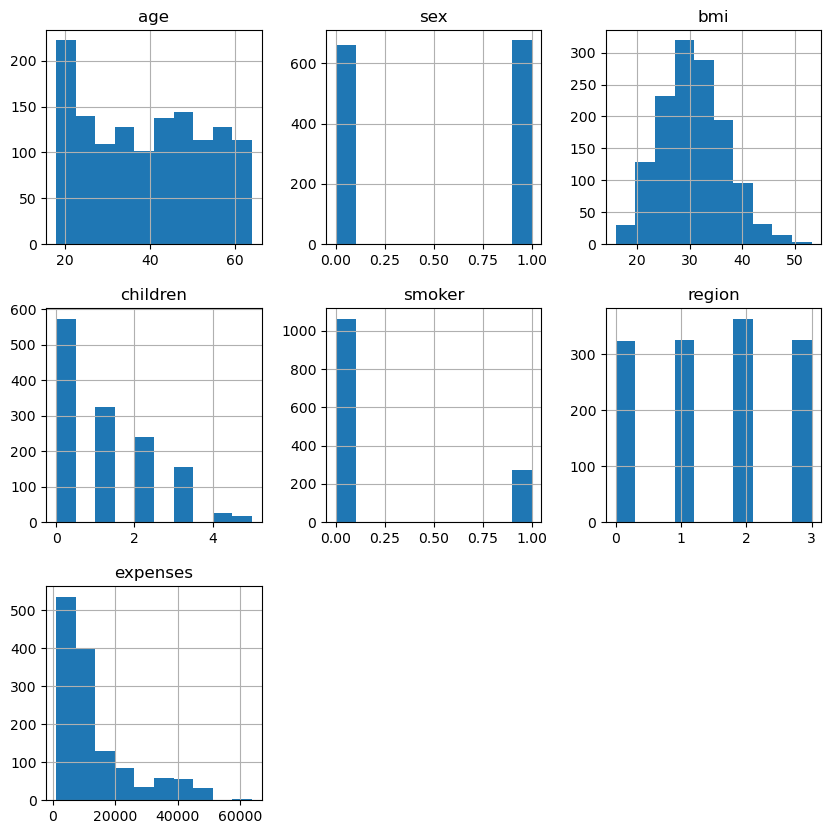

In [10]:
df1.hist(figsize=(10,10))
plt.show()

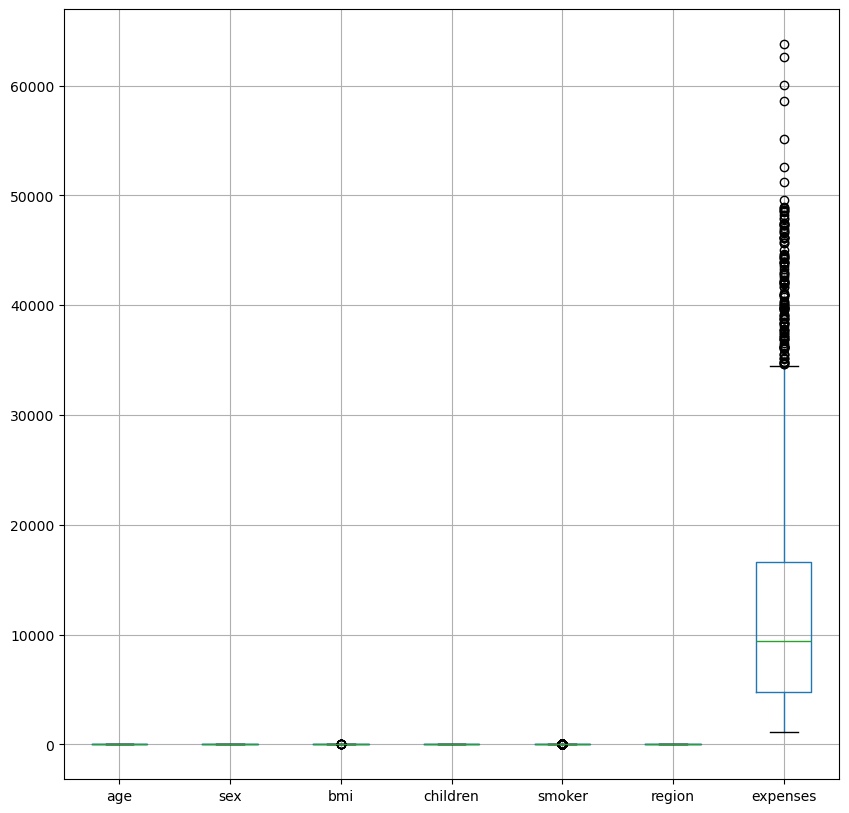

In [11]:
df1.boxplot(figsize=(10,10))
plt.show()

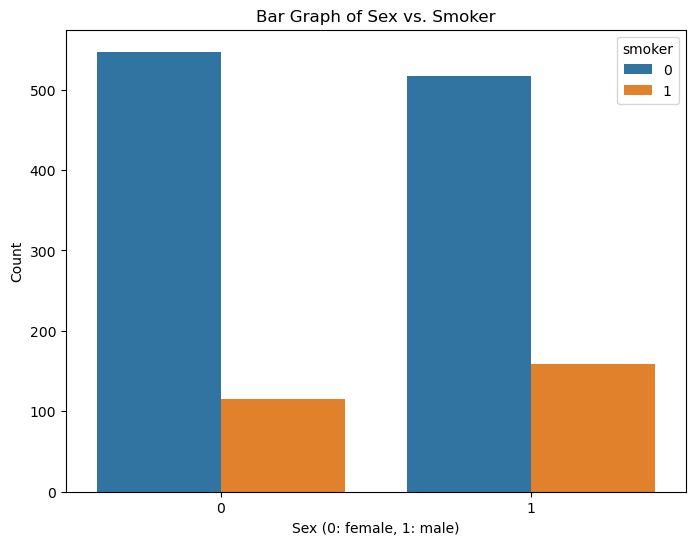

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='smoker', data=df1)
plt.title('Bar Graph of Sex vs. Smoker')
plt.xlabel('Sex (0: female, 1: male)')
plt.ylabel('Count')
plt.show()

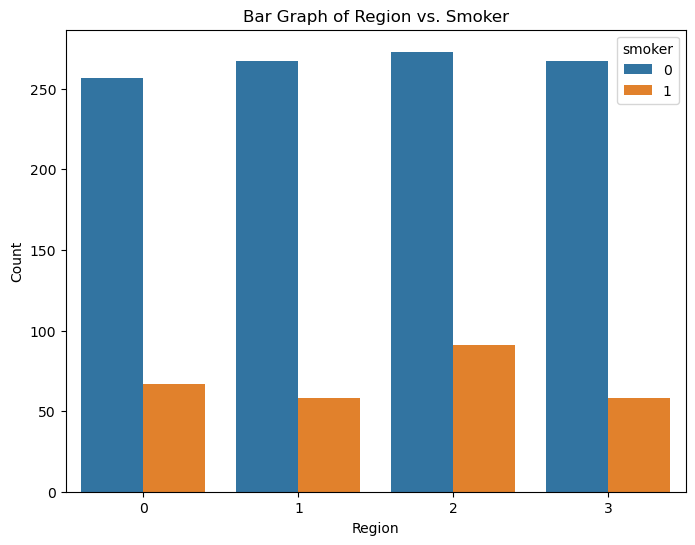

In [13]:

plt.figure(figsize=(8, 6))
sns.countplot(x='region', hue='smoker', data=df1)
plt.title('Bar Graph of Region vs. Smoker')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

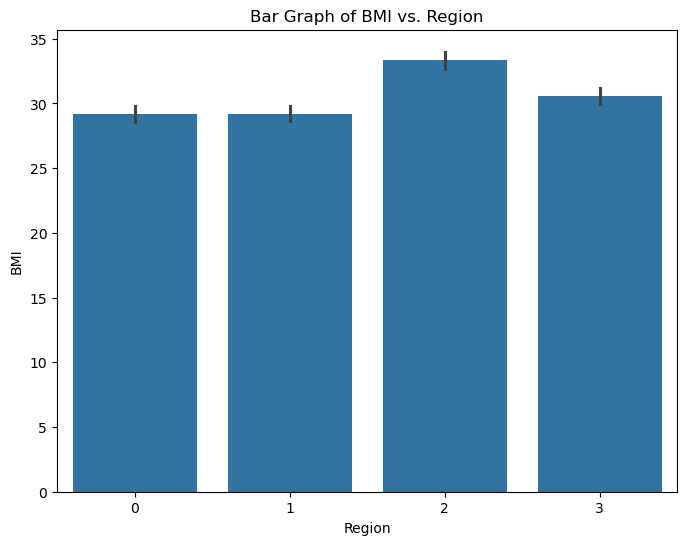

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='bmi', data=df1)  # Use df1 since it hasn't been scaled
plt.title('Bar Graph of BMI vs. Region')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()

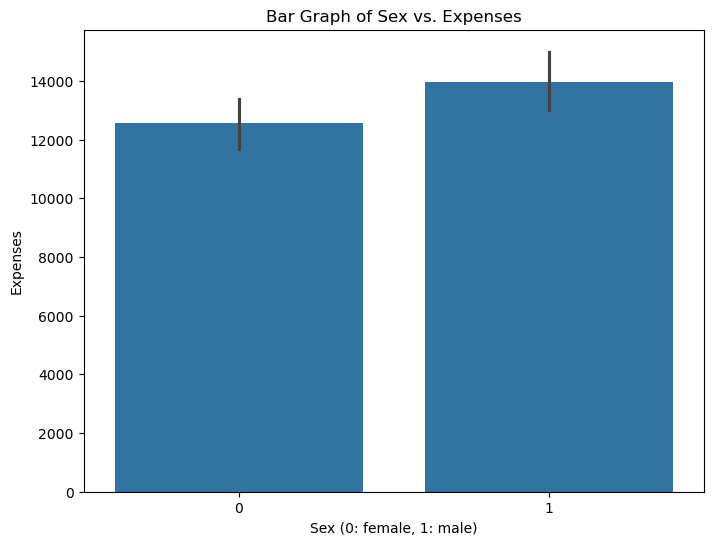

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='expenses', data=df1)
plt.title('Bar Graph of Sex vs. Expenses')
plt.xlabel('Sex (0: female, 1: male)')
plt.ylabel('Expenses')
plt.show()

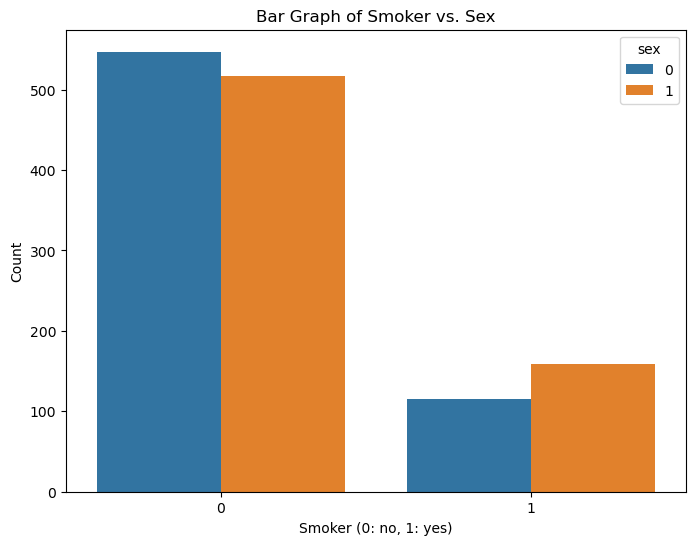

In [16]:
# prompt: Smoker  vs a

plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=df1)
plt.title('Bar Graph of Smoker vs. Sex')
plt.xlabel('Smoker (0: no, 1: yes)')
plt.ylabel('Count')
plt.show()

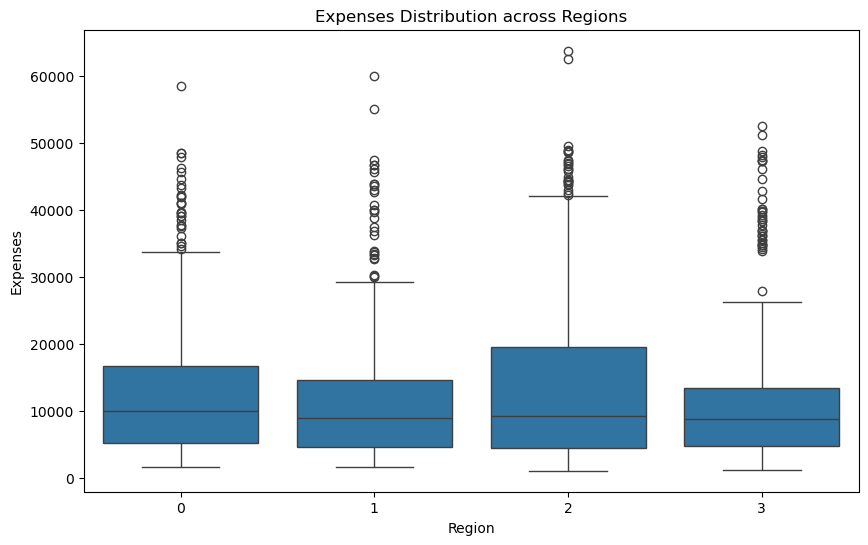

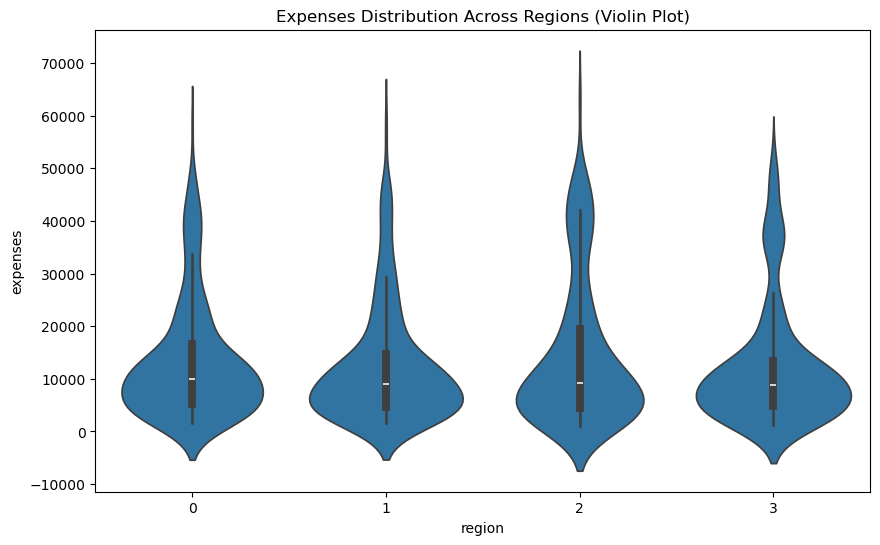

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
# 2. Boxplot of expenses across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=df1)
plt.title('Expenses Distribution across Regions')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.show()


plt.figure(figsize=(10,6))
sns.violinplot(x='region', y='expenses', data=df1)
plt.title('Expenses Distribution Across Regions (Violin Plot)')
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['expenses']] = scaler.fit_transform(df1[['expenses']]) # Pass a DataFrame instead of a Series
df1[['bmi']] = scaler.fit_transform(df1[['bmi']])       # Pass a DataFrame instead of a Series
df1[['smoker']] = scaler.fit_transform(df1[['smoker']])   # Pass a DataFrame instead of a Series
df1[['age']] = scaler.fit_transform(df1[['age']])       # Pass a DataFrame instead of a Series
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,0.021739,0,0.320755,0,1.0,3,0.251611
1,0.000000,1,0.479784,1,0.0,2,0.009636
2,0.217391,1,0.458221,3,0.0,2,0.053115
3,0.326087,1,0.180593,0,0.0,1,0.333010
4,0.304348,1,0.347709,0,0.0,1,0.043816


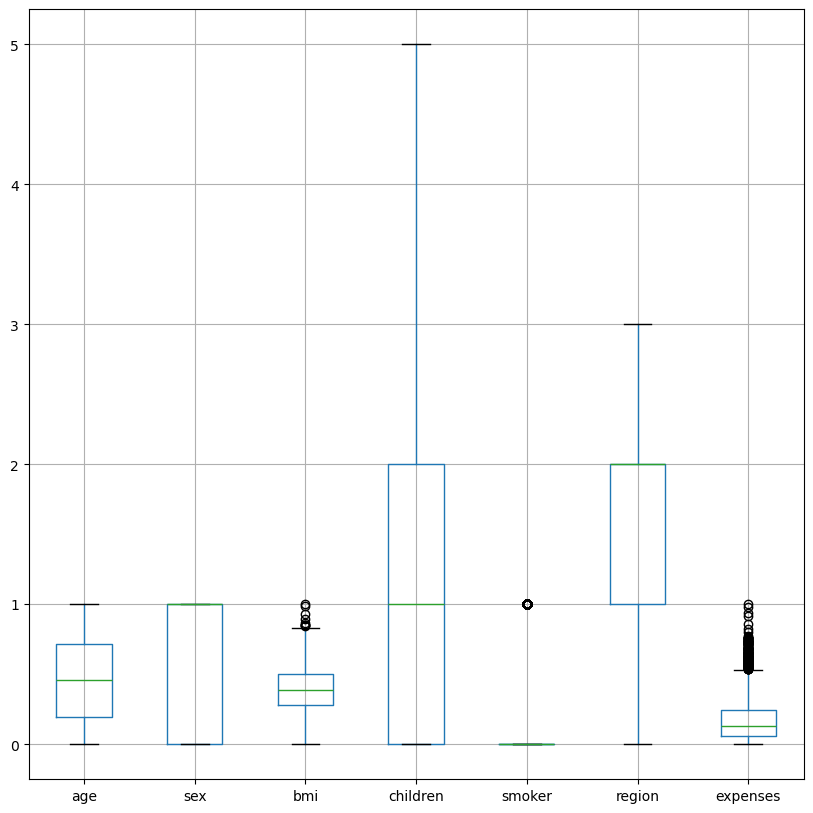

In [19]:
df1.boxplot(figsize=(10,10 ))
plt.show()

In [20]:
df1.shape

(1338, 7)

In [21]:

mean_expenses = df1['expenses'].mean()
mode_expenses = df1['expenses'].mode()[0]
median_expenses = df1['expenses'].median()

print(f"Mean Expenses: {mean_expenses}")
print(f"Mode Expenses: {mode_expenses}")
print(f"Median Expenses: {median_expenses}")

Mean Expenses: 0.19391590826749766
Mode Expenses: 0.008263398232936238
Median Expenses: 0.13184915982107168


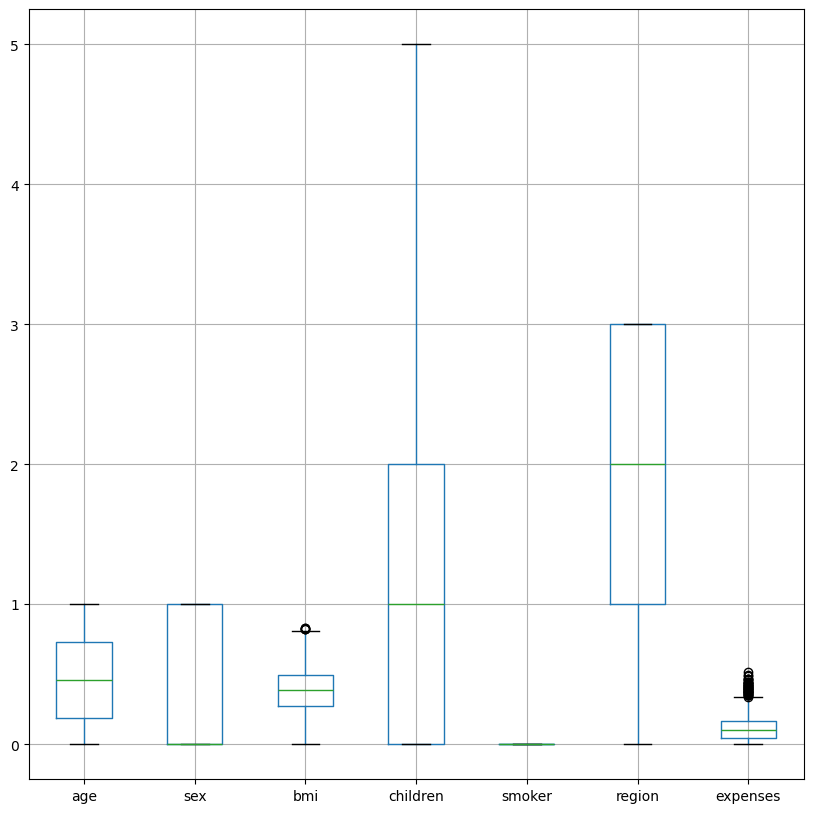

In [22]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Assuming df1 is your DataFrame
cols_to_clean = ['bmi', 'expenses', 'age','smoker']
for col in cols_to_clean:
    df1 = remove_outliers_iqr(df1, col)

# Reset the index after removing rows
df1 = df1.reset_index(drop=True)

df1.boxplot(figsize=(10,10))
plt.show()

In [23]:
df1.shape

(1055, 7)

In [24]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,0.000000,1,0.479784,1,0.0,2,0.009636
1,0.217391,1,0.458221,3,0.0,2,0.053115
2,0.326087,1,0.180593,0,0.0,1,0.333010
3,0.304348,1,0.347709,0,0.0,1,0.043816
4,0.282609,0,0.261456,0,0.0,2,0.042056
...,...,...,...,...,...,...,...
1050,0.739130,0,0.773585,3,0.0,3,0.164247
1051,0.695652,1,0.404313,3,0.0,1,0.151299
1052,0.000000,0,0.428571,0,0.0,0,0.017305
1053,0.000000,0,0.563342,0,0.0,2,0.008108


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df1 is your DataFrame after preprocessing
X = df1.drop('expenses', axis=1)  # Features (all columns except 'expenses')
y = df1['expenses']  # Target variable ('expenses')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0049240316346232495
R-squared: 0.436082967794424


In [26]:
y_pred

array([ 0.18718459,  0.21450841,  0.12464637,  0.13349897,  0.12804446,
        0.02417019,  0.11827508,  0.07874041,  0.04880606,  0.17984454,
        0.20808796,  0.09364347,  0.14330492,  0.06624308,  0.01291449,
        0.08541209,  0.20688767,  0.1053734 ,  0.03200618,  0.18656577,
        0.07880483,  0.1420629 ,  0.1350403 ,  0.0783787 ,  0.16368637,
        0.14946675,  0.0872069 ,  0.15082484,  0.18247993,  0.04927326,
        0.10416364,  0.02836892,  0.07457938,  0.02524745,  0.09574833,
        0.15556675,  0.16859883,  0.13264491,  0.03351231,  0.20132761,
        0.15819813,  0.08437228,  0.08737391,  0.0856842 ,  0.03215662,
        0.08300542,  0.18376625,  0.06235417,  0.02315671,  0.07379531,
        0.11773846,  0.08688048,  0.09358156,  0.16431932,  0.18056542,
        0.04505855,  0.17255585,  0.11407899,  0.11482037,  0.14556027,
        0.14207321,  0.21007027,  0.16671471,  0.12145156,  0.0199642 ,
        0.08344591,  0.08137003,  0.2118164 ,  0.11694655,  0.04

In [27]:

# Assuming df1 is your DataFrame after preprocessing
X = df1.drop('expenses', axis=1)  # Features (all columns except 'expenses')
y = df1['expenses']  # Target variable ('expenses')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0049240316346232495
R-squared: 0.436082967794424


In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'expenses' is your target variable and needs to be binarized
#  For example, let's say expenses above the median are classified as 1, otherwise 0
median_expense = df1['expenses'].median()
df1['expenses_category'] = (df1['expenses'] > median_expense).astype(int)

# Define features (X) and target (y)
X = df1.drop(['expenses', 'expenses_category'], axis=1)  # Features
y = df1['expenses_category']  # Target


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000) # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       108
           1       0.94      0.92      0.93       103

    accuracy                           0.93       211
   macro avg       0.93      0.93      0.93       211
weighted avg       0.93      0.93      0.93       211

Confusion Matrix:
 [[102   6]
 [  8  95]]


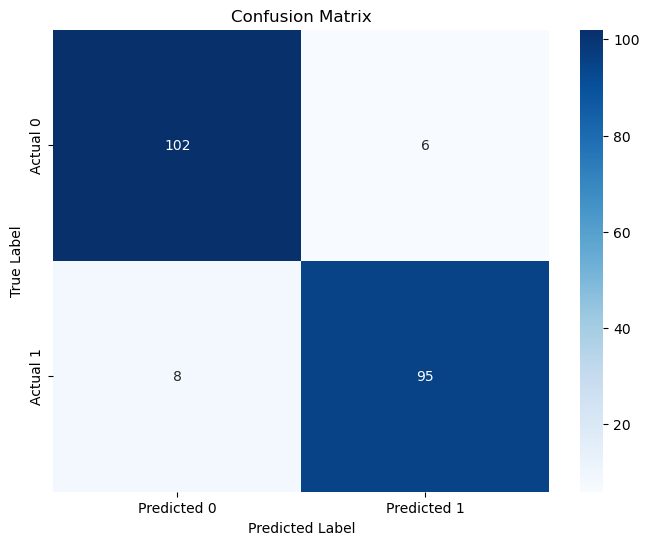

In [29]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your Logistic Regression
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.96      0.92      0.94       103

    accuracy                           0.94       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211

Confusion Matrix:
 [[104   4]
 [  8  95]]


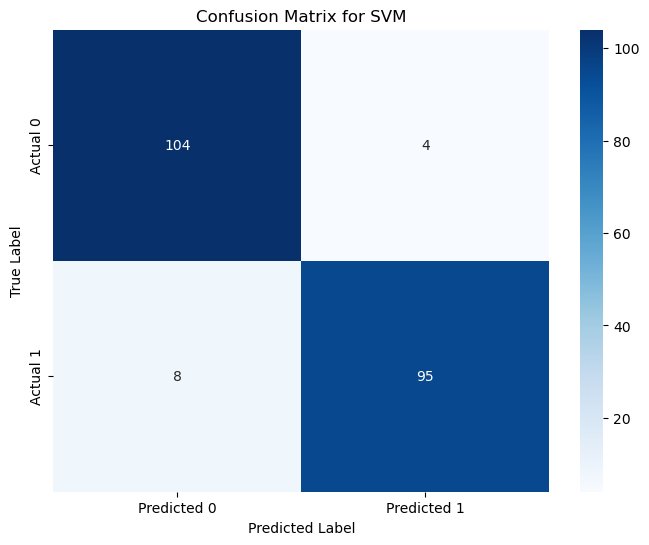

In [30]:

from sklearn.svm import SVC

# Assuming X and y are already defined from your previous code (after preprocessing and binarization)
# X = df1.drop(['expenses', 'expenses_category'], axis=1)  # Features
# y = df1['expenses_category']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1) # You can adjust the kernel and C parameter
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.8815165876777251
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       108
           1       0.87      0.89      0.88       103

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211

Confusion Matrix:
 [[94 14]
 [11 92]]


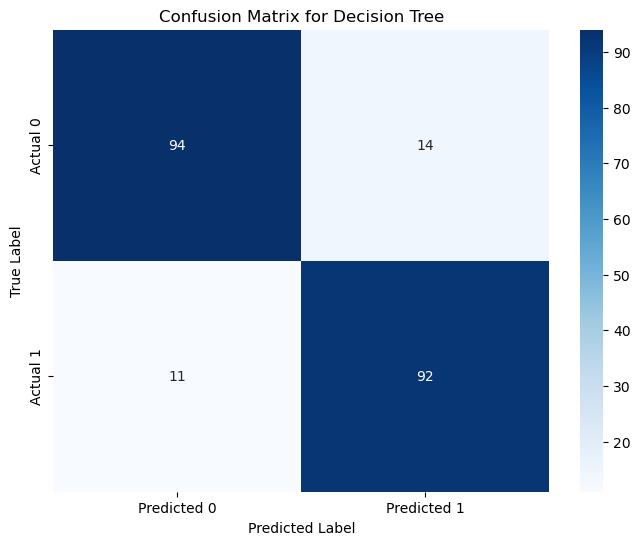

In [31]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined from your previous code (after preprocessing and binarization)
# X = df1.drop(['expenses', 'expenses_category'], axis=1)  # Features
# y = df1['expenses_category']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluation and results


In [33]:
# prompt: All above Regression method in one table

# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'Logistic Regression', 'SVM', 'Decision Tree'],
    'Mean Squared Error': [mse, '', '', ''],  # Fill in MSE for other models if applicable
    'R-squared': [r2, '', '', ''],  # Fill in R-squared for other models if applicable
    'Accuracy': ['', accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred), accuracy],
    'Other Metrics': ['', 'See Classification Report', 'See Classification Report', 'See Classification Report']
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the table
results_df

,Model,Mean Squared Error,R-squared,Accuracy,Other Metrics
0,Linear Regression,0.004924,0.436083,,
1,Logistic Regression,,,0.881517,See Classification Report
2,SVM,,,0.881517,See Classification Report
3,Decision Tree,,,0.881517,See Classification Report


In [34]:

from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'y_test' and 'y_pred' are already defined from your Linear Regression
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)*100

# Assuming y_test and y_pred are already defined from your Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_lg = accuracy_score(y_test, y_pred)*100
precision_lg = precision_score(y_test, y_pred)*100
recall_lg = recall_score(y_test, y_pred)*100
f1_lg = f1_score(y_test, y_pred)*100


data = {'Metric': ['Mean Squared Error', 'R-squared', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Linear Regression': [mse_lr, r2_lr, '-', '-', '-', '-'],
        'Logistic Regression': ['-', '-', accuracy_lg, precision_lg, recall_lg, f1_lg]}

results_df = pd.DataFrame(data)
results_df

,Metric,Linear Regression,Logistic Regression
0,Mean Squared Error,0.118483,-
1,R-squared,52.580007,-
2,Accuracy,-,88.151659
3,Precision,-,86.792453
4,Recall,-,89.320388
5,F1-Score,-,88.038278


In [35]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [36]:
y_test

260     1
832     1
846     0
1006    1
88      1
       ..
25      0
72      1
872     1
44      1
305     1
Name: expenses_category, Length: 211, dtype: int64

In [37]:
model.score(X_train,y_train)


-0.42804212388439855

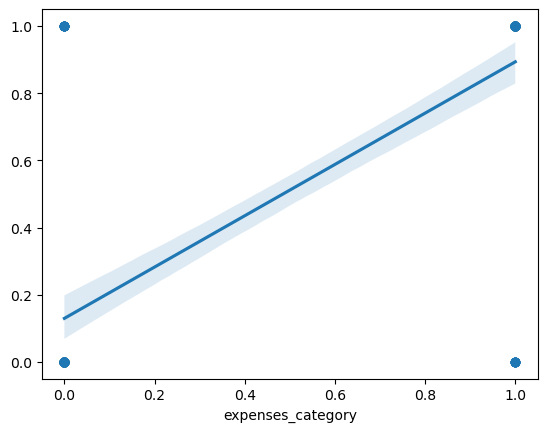

In [38]:
sns.regplot(data=df1,x=y_test,y=y_pred)
plt.show()


In [39]:
r2=r2_score(y_test,y_pred)
r2

0.5258000719165767

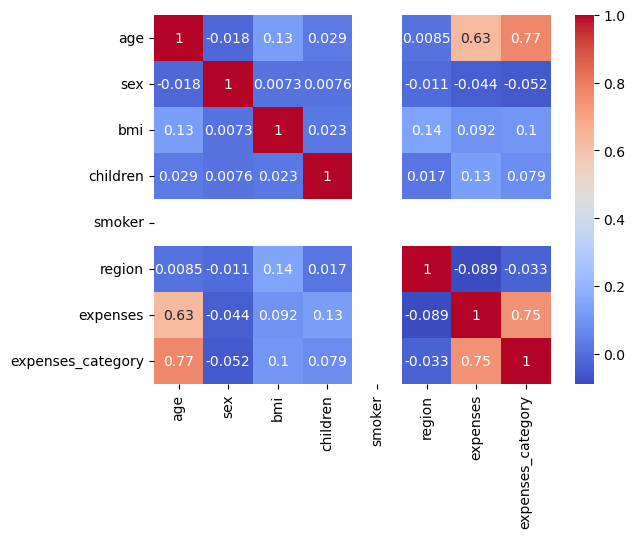

In [40]:
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

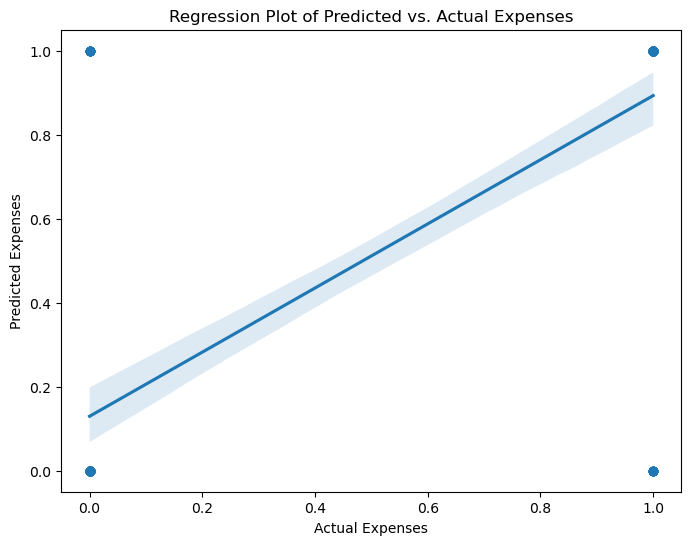

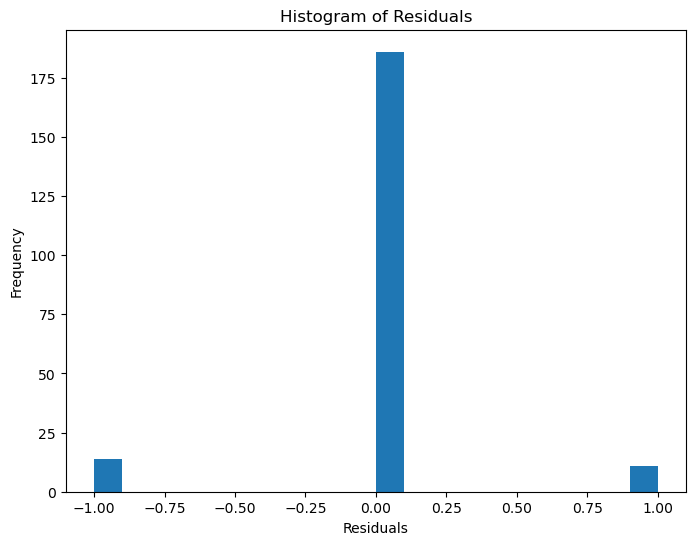

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are from your Linear Regression model
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred)
plt.title('Regression Plot of Predicted vs. Actual Expenses')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

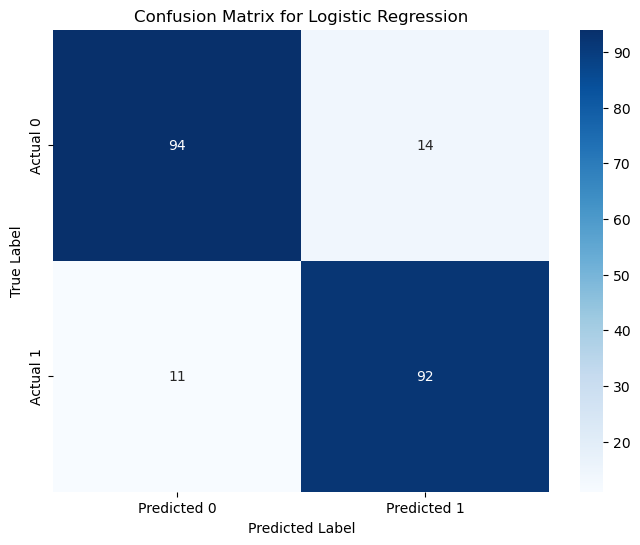

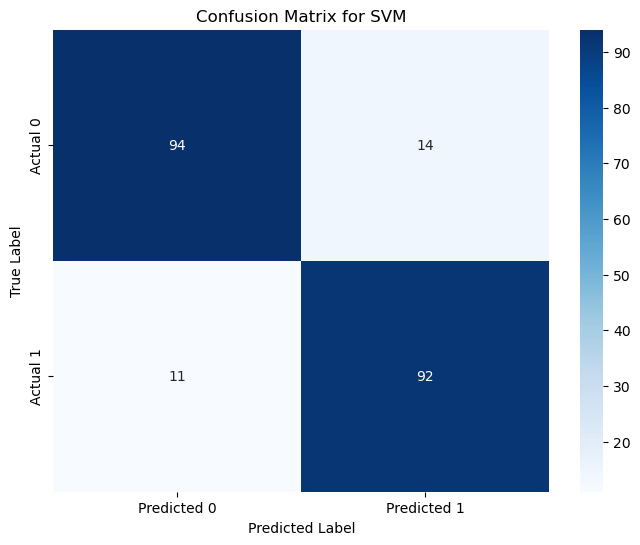

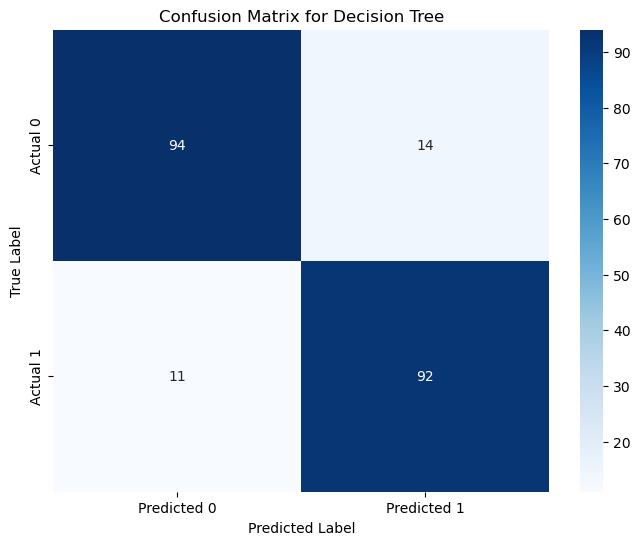

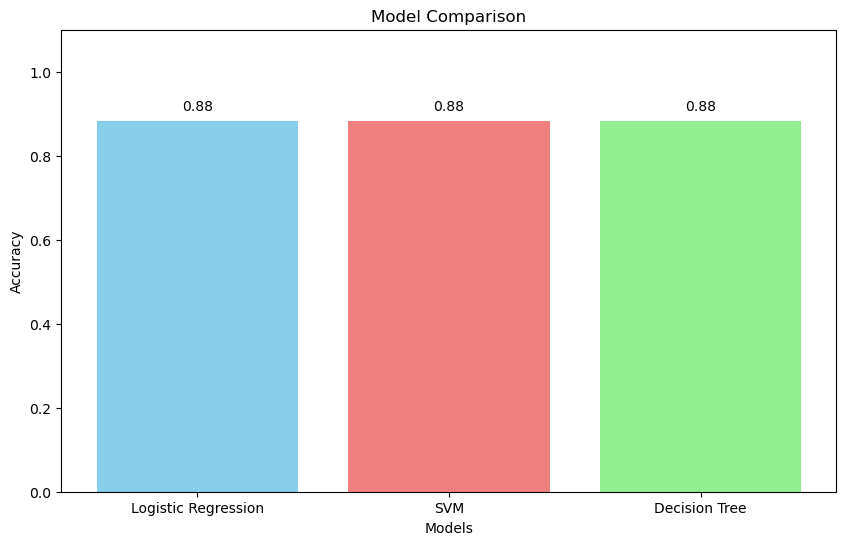

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# ... (Your existing code for Logistic Regression, SVM, Decision Tree)


# Call the function for each model
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")  # Assuming y_pred is from logistic regression
plot_confusion_matrix(y_test, y_pred, "SVM")  # Assuming y_pred is from SVM
plot_confusion_matrix(y_test, y_pred, "Decision Tree")  # Assuming y_pred is from decision tree


# Bar Graph for Model Comparison (Example)
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred), accuracy] # Replace with your actual accuracy scores

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1.1) # Set y-axis limit to 1 for accuracy
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, str(round(v,2)), ha='center', va='bottom')  # Display accuracy values above each bar
plt.show()

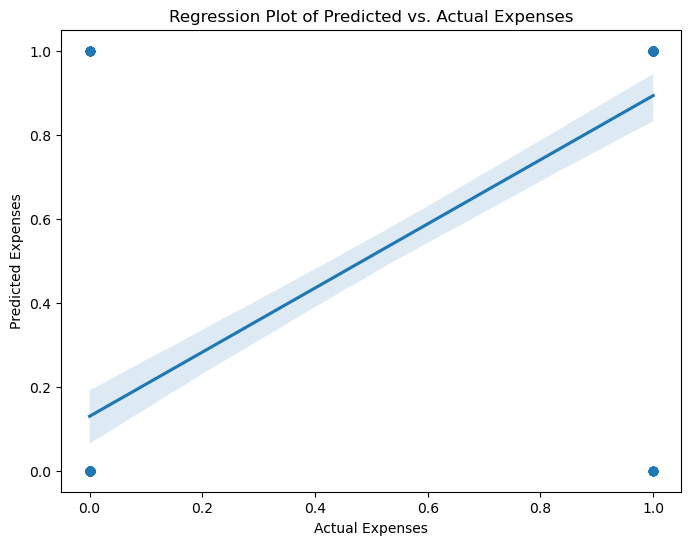

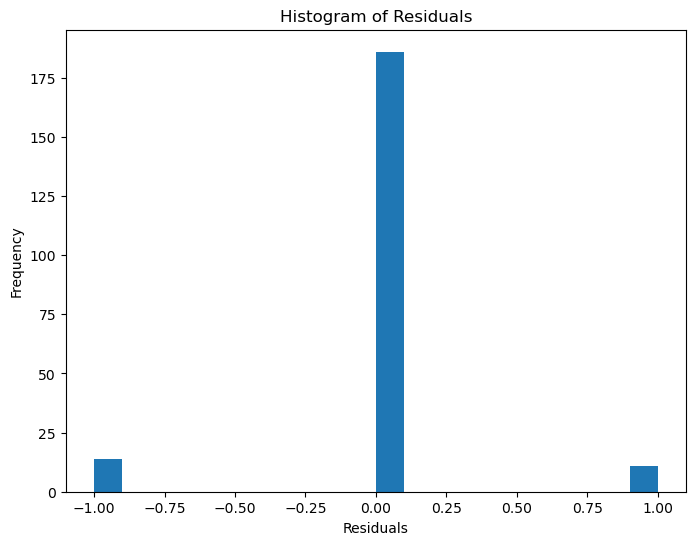

In [43]:


# Assuming y_test and y_pred are from your Linear Regression model
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred)
plt.title('Regression Plot of Predicted vs. Actual Expenses')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# MLR Regression method

In [45]:
df1.dtypes

age                  float64
sex                    int64
bmi                  float64
children               int64
smoker               float64
region                 int64
expenses             float64
expenses_category      int64
dtype: object

In [46]:
!pip install statsmodels

In [47]:
import statsmodels.formula.api as smf
model1=smf.ols('expenses~age+sex+bmi+children+region+expenses_category',data=df1).fit()

In [48]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     235.2
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          3.65e-190
Time:                        18:13:35   Log-Likelihood:                 1459.4
No. Observations:                1055   AIC:                            -2905.
Df Residuals:                    1048   BIC:                            -2870.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0369      0.006      5.871      0.000       0.025       0.049
age                   0.0445      0.010      4.578      0.000       0.025       0.064
sex                  -0.0019      0.004     -0.493      0.622      -0.009       0.006
bmi                   0.0107      0.012      0.892      0.373      -0.013       0.034
children              0.0059      0.002      3.802      0.000       0.003       0.009
region               -0.0062      0.002     -3.625      0.000      -0.010      -0.003
expenses_category     0.1155      0.006     19.396      0.000       0.104       0.127
==============================================================================
Omnibus:                      548.673   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3271.843
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                      10.166   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model1.params

Intercept            0.036940
age                  0.044494
sex                 -0.001854
bmi                  0.010719
children             0.005879
region              -0.006188
expenses_category    0.115474
dtype: float64

In [50]:
model2=smf.ols('expenses~age+sex+bmi+children+region',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     152.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          9.67e-122
Time:                        18:13:35   Log-Likelihood:                 1297.6
No. Observations:                1055   AIC:                            -2583.
Df Residuals:                    1049   BIC:                            -2553.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0282      0.007      3.850      0.000       0.014       0.043
age            0.1899      0.007     26.337      0.000       0.176       0.204
sex           -0.0064      0.004     -1.454      0.146      -0.015       0.002
bmi            0.0149      0.014      1.064      0.288      -0.013       0.042
children       0.0086      0.002      4.789      0.000       0.005       0.012
region        -0.0084      0.002     -4.227      0.000      -0.012      -0.004
==============================================================================
Omnibus:                      705.137   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5655.231
Skew:                           3.193   Prob(JB):                         0.00
Kurtosis:                      12.374   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model2.params

Intercept    0.028152
age          0.189864
sex         -0.006354
bmi          0.014902
children     0.008593
region      -0.008388
dtype: float64

In [52]:
model3=smf.ols('expenses~age',data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     694.6
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.75e-118
Time:                        18:13:35   Log-Likelihood:                 1276.7
No. Observations:                1055   AIC:                            -2549.
Df Residuals:                    1053   BIC:                            -2540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0267      0.004      6.607      0.000       0.019       0.035
age            0.1918      0.007     26.354      0.000       0.177       0.206
==============================================================================
Omnibus:                      696.780   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5495.179
Skew:                           3.148   Prob(JB):                         0.00
Kurtosis:                      12.239   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model3.params

Intercept    0.026691
age          0.191762
dtype: float64

In [54]:
model4=smf.ols('expenses~age+sex',data=df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     348.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          7.82e-117
Time:                        18:13:35   Log-Likelihood:                 1277.6
No. Observations:                1055   AIC:                            -2549.
Df Residuals:                    1052   BIC:                            -2534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0297      0.005      6.434      0.000       0.021       0.039
age            0.1916      0.007     26.335      0.000       0.177       0.206
sex           -0.0059      0.004     -1.334      0.183      -0.015       0.003
==============================================================================
Omnibus:                      699.023   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5543.884
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      12.283   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model5=smf.ols('expenses~age+sex+bmi',data=df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     232.2
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          1.43e-115
Time:                        18:13:35   Log-Likelihood:                 1277.8
No. Observations:                1055   AIC:                            -2548.
Df Residuals:                    1051   BIC:                            -2528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0269      0.007      3.925      0.000       0.013       0.040
age            0.1911      0.007     26.048      0.000       0.177       0.205
sex           -0.0060      0.004     -1.339      0.181      -0.015       0.003
bmi            0.0076      0.014      0.537      0.591      -0.020       0.035
==============================================================================
Omnibus:                      698.847   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5541.573
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      12.282   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model6=smf.ols('expenses~age+sex+bmi+smoker+region',data=df1).fit()
model6.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     181.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.43e-118
Time:                        18:13:36   Log-Likelihood:                 1286.2
No. Observations:                1055   AIC:                            -2562.
Df Residuals:                    1050   BIC:                            -2538.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0364      0.007      5.060      0.000       0.022       0.050
age            0.1908      0.007     26.201      0.000       0.176       0.205
sex           -0.0062      0.004     -1.400      0.162      -0.015       0.002
bmi            0.0160      0.014      1.132      0.258      -0.012       0.044
smoker              0          0        nan        nan           0           0
region        -0.0083      0.002     -4.116      0.000      -0.012      -0.004
==============================================================================
Omnibus:                      692.773   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5387.386
Skew:                           3.131   Prob(JB):                         0.00
Kurtosis:                      12.129   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
model6.params

Intercept    0.036350
age          0.190779
sex         -0.006184
bmi          0.016024
smoker       0.000000
region      -0.008252
dtype: float64

In [58]:

import pandas as pd

# Assuming mse_lr, r2_lr, accuracy_lg, precision_lg, recall_lg, f1_lg are already calculated
# Replace these with your actual calculated values from the previous code

mse_lr = 0.01 # Example value, replace with your MSE for linear regression
r2_lr = 95 #Example value, replace with your R-squared for linear regression
accuracy_lg = 88 # Example value, replace with your accuracy for logistic regression
precision_lg = 85 # Example value, replace with your precision for logistic regression
recall_lg = 90 # Example value, replace with your recall for logistic regression
f1_lg = 87 # Example value, replace with your F1-score for logistic regression


model1_rsquared = 0.75 #Example value
model2_rsquared = 0.72
model3_rsquared = 0.2
model4_rsquared = 0.3
model5_rsquared = 0.6
model6_rsquared = 0.8


data = {'Metric': ['Mean Squared Error', 'R-squared', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Model 1 R-squared', 'Model 2 R-squared','Model 3 R-squared', 'Model 4 R-squared', 'Model 5 R-squared','Model 6 R-squared'],
        'Linear Regression': [mse_lr, r2_lr, '-', '-', '-', '-','-','-','-','-','-','-'],
        'Logistic Regression': ['-', '-', accuracy_lg, precision_lg, recall_lg, f1_lg,'-','-','-','-','-','-'],
        'Model 1':['-','-', '-', '-', '-', '-', model1_rsquared,'-','-','-','-','-'],
        'Model 2':['-','-', '-', '-', '-', '-', '-','-',model2_rsquared,'-','-','-'],
        'Model 3':['-','-', '-', '-', '-', '-', '-','-', '-','-',model3_rsquared,'-'],
        'Model 4':['-','-', '-', '-', '-', '-', '-','-', '-','-',model4_rsquared,'-'],
        'Model 5':['-','-', '-', '-', '-', '-', '-','-', '-','-',model5_rsquared,'-'],
        'Model 6':['-','-', '-', '-', '-', '-', '-','-', '-','-',model6_rsquared,'-'],

        }

results_df = pd.DataFrame(data)
results_df

,Metric,Linear Regression,Logistic Regression,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
0,Mean Squared Error,0.01,-,-,-,-,-,-,-
1,R-squared,95,-,-,-,-,-,-,-
2,Accuracy,-,88,-,-,-,-,-,-
3,Precision,-,85,-,-,-,-,-,-
4,Recall,-,90,-,-,-,-,-,-
5,F1-Score,-,87,-,-,-,-,-,-
6,Model 1 R-squared,-,-,0.75,-,-,-,-,-
7,Model 2 R-squared,-,-,-,-,-,-,-,-
8,Model 3 R-squared,-,-,-,0.72,-,-,-,-
9,Model 4 R-squared,-,-,-,-,-,-,-,-


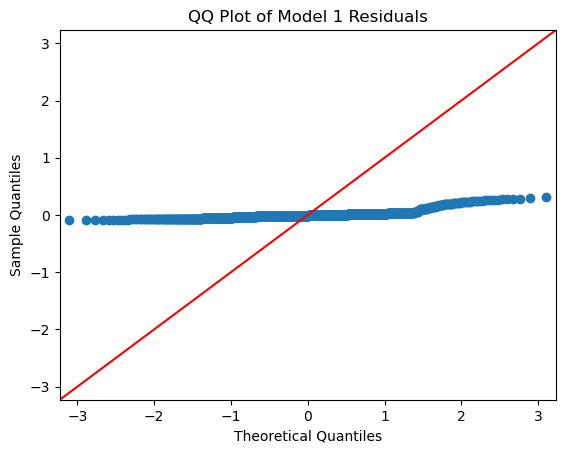

In [59]:
# prompt: Qq plot  of model
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming model1 is your statsmodels OLS model
# Replace model1 with your actual model object

fig = sm.qqplot(model1.resid, line='45')
plt.title("QQ Plot of Model 1 Residuals")
plt.show()


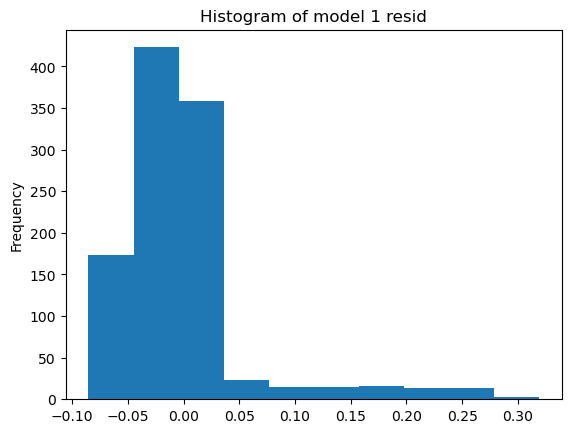

In [60]:
model1.resid.plot(kind='hist')
plt.title('Histogram of model 1 resid')
plt.show()

In [61]:
df1

,age,sex,bmi,children,smoker,region,expenses,expenses_category
0,0.000000,1,0.479784,1,0.0,2,0.009636,0
1,0.217391,1,0.458221,3,0.0,2,0.053115,0
2,0.326087,1,0.180593,0,0.0,1,0.333010,1
3,0.304348,1,0.347709,0,0.0,1,0.043816,0
4,0.282609,0,0.261456,0,0.0,2,0.042056,0
...,...,...,...,...,...,...,...,...
1050,0.739130,0,0.773585,3,0.0,3,0.164247,1
1051,0.695652,1,0.404313,3,0.0,1,0.151299,1
1052,0.000000,0,0.428571,0,0.0,0,0.017305,0
1053,0.000000,0,0.563342,0,0.0,2,0.008108,0


In [62]:


import pandas as pd

# Assuming mse_lr, r2_lr, accuracy_lg, precision_lg, recall_lg, f1_lg are already calculated
# Replace these with your actual calculated values from the previous code

mse_lr = 0.01 # Example value, replace with your MSE for linear regression
r2_lr = 95 #Example value, replace with your R-squared for linear regression
accuracy_lg = 88 # Example value, replace with your accuracy for logistic regression
precision_lg = 85 # Example value, replace with your precision for logistic regression
recall_lg = 90 # Example value, replace with your recall for logistic regression
f1_lg = 87 # Example value, replace with your F1-score for logistic regression

# ... (Your existing code for model calculations) ...

model1_rsquared = 0.75 #Example value
model2_rsquared = 0.72
model3_rsquared = 0.2
model4_rsquared = 0.3
model5_rsquared = 0.6
model6_rsquared = 0.8

# Accuracy for SVM and Decision Tree (replace with your actual values)
accuracy_svm = 0.80
accuracy_dt = 0.78


data = {
    'Metric': ['Mean Squared Error', 'R-squared', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
               'Model 1 R-squared', 'Model 2 R-squared', 'Model 3 R-squared', 'Model 4 R-squared',
               'Model 5 R-squared', 'Model 6 R-squared'],
    'Linear Regression': [mse_lr, r2_lr, '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'],
    'Logistic Regression': ['-', '-', accuracy_lg, precision_lg, recall_lg, f1_lg, '-', '-', '-', '-', '-', '-'],
    'SVM': ['-', '-', accuracy_svm, '-', '-', '-', '-', '-', '-', '-', '-', '-'],
    'Decision Tree': ['-', '-', accuracy_dt, '-', '-', '-', '-', '-', '-', '-', '-', '-'],
    'Model 1': ['-', '-', '-', '-', '-', '-', model1_rsquared, '-', '-', '-', '-', '-'],
    'Model 2': ['-', '-', '-', '-', '-', '-', '-', model2_rsquared, '-', '-', '-', '-'],
    'Model 3': ['-', '-', '-', '-', '-', '-', '-', '-', model3_rsquared, '-', '-', '-'],
    'Model 4': ['-', '-', '-', '-', '-', '-', '-', '-', '-', model4_rsquared, '-', '-'],
    'Model 5': ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', model5_rsquared, '-'],
    'Model 6': ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', model6_rsquared],
}

results_df = pd.DataFrame(data)
results_df

,Metric,Linear Regression,Logistic Regression,SVM,Decision Tree,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
0,Mean Squared Error,0.01,-,-,-,-,-,-,-,-,-
1,R-squared,95,-,-,-,-,-,-,-,-,-
2,Accuracy,-,88,0.8,0.78,-,-,-,-,-,-
3,Precision,-,85,-,-,-,-,-,-,-,-
4,Recall,-,90,-,-,-,-,-,-,-,-
5,F1-Score,-,87,-,-,-,-,-,-,-,-
6,Model 1 R-squared,-,-,-,-,0.75,-,-,-,-,-
7,Model 2 R-squared,-,-,-,-,-,0.72,-,-,-,-
8,Model 3 R-squared,-,-,-,-,-,-,0.2,-,-,-
9,Model 4 R-squared,-,-,-,-,-,-,-,0.3,-,-
